In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/car_price_dataset.csv')

print("First 5 rows:")
display(df.head())

print("\nDataFrame Info:")
df.info()

print("\nStatistical Summary:")
display(df.describe())

First 5 rows:


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB

Statistical Summary:


,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


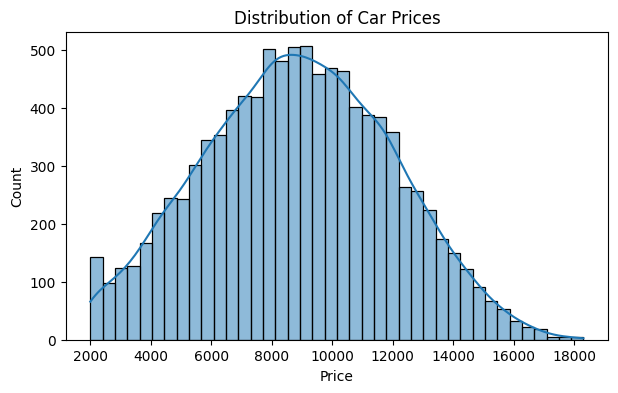

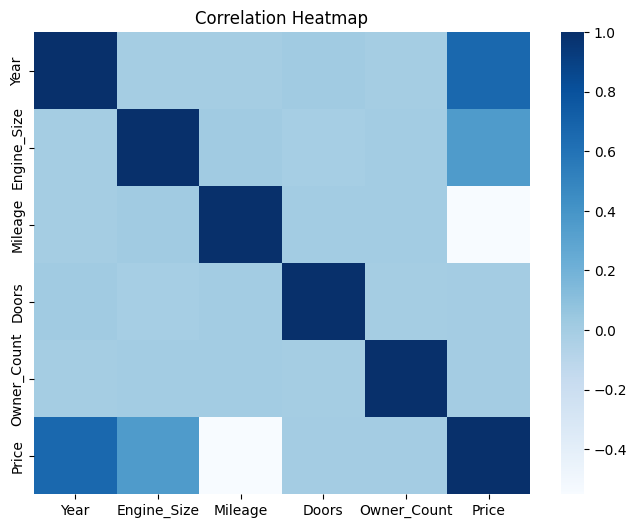

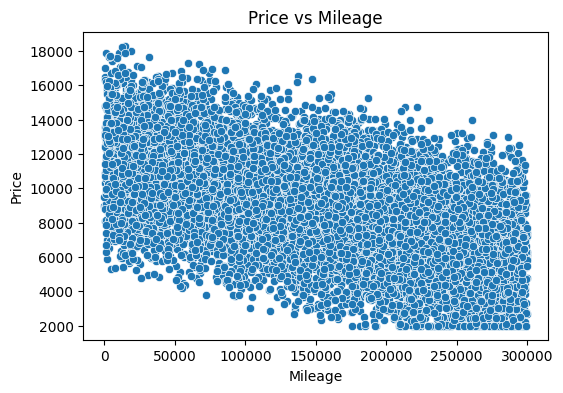

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Price
if 'Price' in df.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(df['Price'], kde=True)
    plt.title('Distribution of Car Prices')
    plt.show()

# 2. Correlation heatmap (for numeric columns)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='Blues', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# 3. Scatter plot for Price vs Mileage (if these columns exist)
if 'Mileage' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Mileage', y='Price', data=df)
    plt.title('Price vs Mileage')
    plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder

# 1. Drop duplicates
initial_len = len(df)
df.drop_duplicates(inplace=True)
print("Duplicates removed:", initial_len - len(df))

# 2. Drop rows with missing values
df.dropna(inplace=True)
print("After dropping NAs, shape =", df.shape)

# 3. Encode categorical columns (adjust these if needed)
categorical_cols = ['Fuel', 'Transmission', 'Make', 'Model']
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

print("Data after encoding sample:")
display(df.head())


Duplicates removed: 0
After dropping NAs, shape = (10000, 10)
Data after encoding sample:


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,24,2020,4.2,Diesel,1,289944,3,5,8501
1,Chevrolet,19,2012,2.0,Hybrid,0,5356,2,3,12092
2,Mercedes,16,2020,4.2,Diesel,0,231440,4,2,11171
3,Audi,22,2023,2.0,Electric,1,160971,2,1,11780
4,Volkswagen,17,2003,2.6,Hybrid,2,286618,3,3,2867


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define target & features
target_col = 'Price'
features = ['Year', 'Mileage', 'Make', 'Model', 'Fuel', 'Transmission']

# Filter out non-existent columns
features = [col for col in features if col in df.columns]

X = df[features]
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Instead of using squared=False, compute RMSE as follows:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2 :", r2)
print("MAE :", mae)
print("RMSE:", rmse)

# Inspect coefficients
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print("\nLinear Regression Coefficients:")
display(coeffs.sort_values('Coefficient', ascending=False))



R^2 : 0.7770479247650435
MAE : 1174.2810362543523
RMSE: 1431.2378273858692

Linear Regression Coefficients:


,Feature,Coefficient
0,Year,298.937744
2,Model,1.619124
1,Mileage,-0.019624
3,Transmission,-802.161117
